In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
data_file = 'data'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_file):
    for image in os.listdir(os.path.join(data_file, image_class)):
        image_path = os.path.join(data_file, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

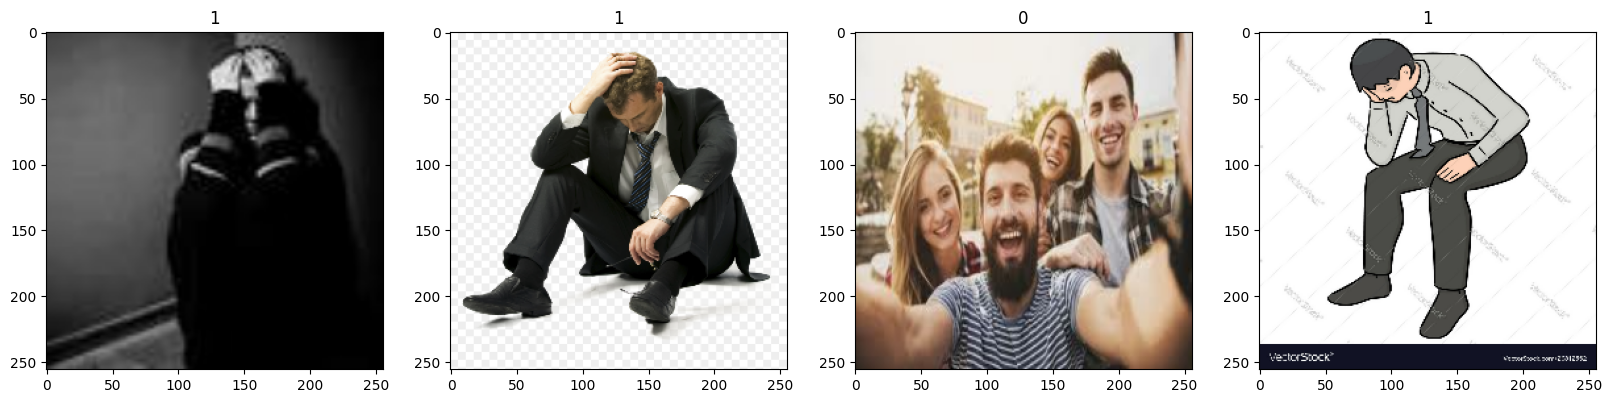

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[2.1275276e-01, 3.6569393e-01, 4.2451745e-01],
          [2.1442249e-01, 3.6736366e-01, 4.2618719e-01],
          [2.1667433e-01, 3.6961550e-01, 4.2843902e-01],
          ...,
          [1.9153924e-01, 3.5232356e-01, 4.3075493e-01],
          [1.9314492e-01, 3.5392922e-01, 4.3236059e-01],
          [1.9706649e-01, 3.5785079e-01, 4.3628216e-01]],
 
         [[1.9355085e-01, 3.4649202e-01, 4.0531558e-01],
          [1.9384763e-01, 3.4678879e-01, 4.0561232e-01],
          [1.9747242e-01, 3.5041359e-01, 4.0923715e-01],
          ...,
          [1.7464001e-01, 3.3542433e-01, 4.0601256e-01],
          [1.7434324e-01, 3.3512756e-01, 4.0571579e-01],
          [1.7842817e-01, 3.3921248e-01, 4.0980071e-01]],
 
         [[2.0000000e-01, 3.4538910e-01, 4.1554075e-01],
          [2.0006196e-01, 3.4545106e-01, 4.1560271e-01],
          [2.0392157e-01, 3.4931067e-01, 4.1946232e-01],
          ...,
          [1.7298560e-01, 3.3376992e-01, 4.0435815e-01],
          [1.7886795e-01, 3.3965227e-

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

7

In [ ]:
val_size

2

In [ ]:
test_size

1

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 23s 3s/step - loss: 0.9485 - accuracy: 0.4420 - val_loss: 0.6762 - val_accuracy: 0.5312
Epoch 2/20
7/7 [==============================] - 20s 3s/step - loss: 0.6772 - accuracy: 0.5223 - val_loss: 0.6700 - val_accuracy: 0.5312
Epoch 3/20
7/7 [==============================] - 20s 3s/step - loss: 0.6459 - accuracy: 0.6161 - val_loss: 0.5408 - val_accuracy: 0.7656
Epoch 4/20
7/7 [==============================] - 20s 2s/step - loss: 0.5928 - accuracy: 0.6741 - val_loss: 0.5458 - val_accuracy: 0.7656
Epoch 5/20
7/7 [==============================] - 20s 3s/step - loss: 0.5449 - accuracy: 0.7277 - val_loss: 0.4914 - val_accuracy: 0.7500
Epoch 6/20
7/7 [==============================] - 19s 2s/step - loss: 0.4165 - accuracy: 0.8304 - val_loss: 0.3427 - val_accuracy: 0.8594
Epoch 7/20
7/7 [==============================] - 20s 3s/step - loss: 0.4141 - accuracy: 0.8214 - val_loss: 0.3577 - val_accuracy: 0.8594
Epoch 8/20
7/7 [==================

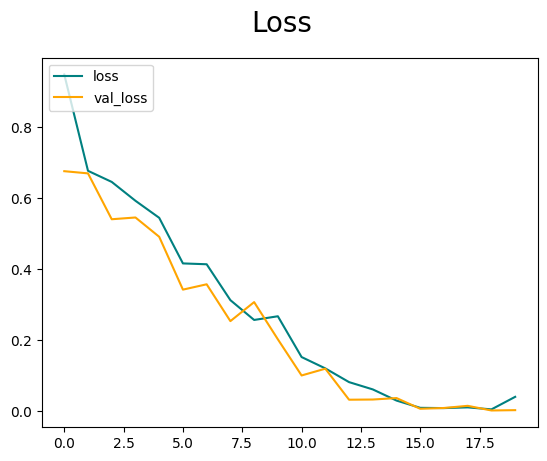

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

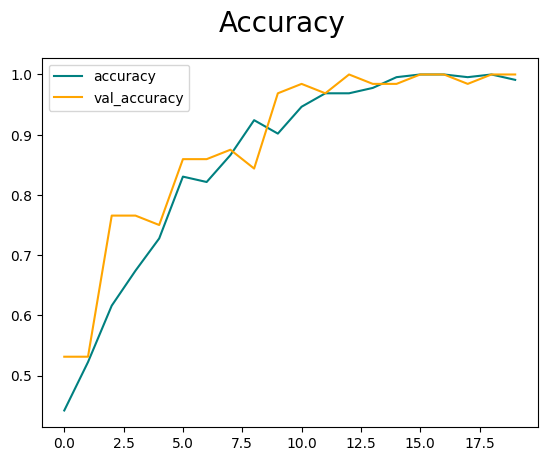

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

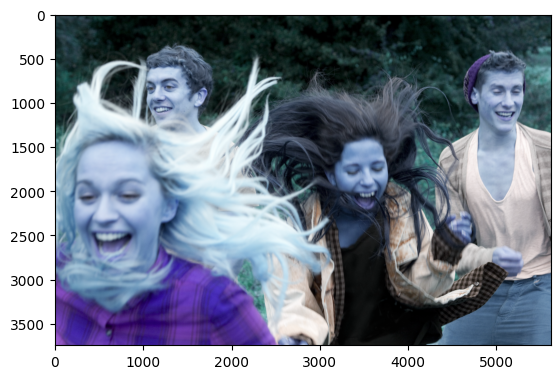

In [ ]:
img = cv2.imread('/154006829.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.imshow(img)
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 153ms/step


array([[0.03744433]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


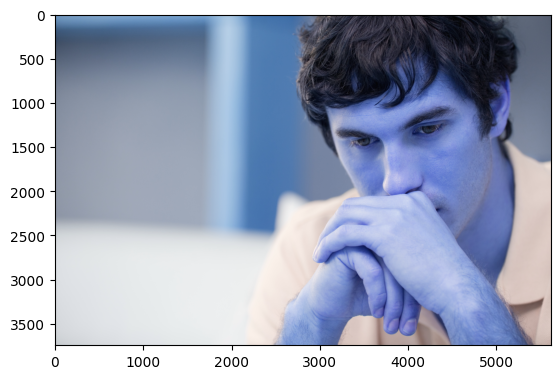

In [ ]:
img = cv2.imread('/8iAb9k4aT.jpg')
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.imshow(img)
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 141ms/step


array([[0.99847496]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
